## Importing packages

In [1]:
%matplotlib notebook
from matplotlib.figure import Figure
import matplotlib as mpl
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

## Setting up endowments and tax rates

### Defining task endowments

In [2]:
from subprocess import run
import sys

controls_path = "D:\Accesos directos\Trabajo\GECE - LEEX\Kristian\Brown\klo_lp_apps\MoneyPolitics\progressivity_pres"

sys.path.insert(0, controls_path)
import controls as ctrl

In [3]:
ctrl.alpha

5

In [4]:
ctrl.beta

2.9

In [5]:
original_task_endowments = ctrl.task_endowments
unique_task_endowments = list(set(ctrl.task_endowments))
unique_task_endowments.sort()
unique_task_endowments

[9, 15, 25, 40, 80, 125]

### Defining tax rates

In [6]:
tax_rates = []
step = 20
for i in range(0, step + 1, 1):
    tax_rates.append(i/step)

## Payoffs data

In [7]:
payoffs_path = "D:\Accesos directos\Trabajo\GECE - LEEX\Kristian\Brown\klo_lp_apps\MoneyPolitics\progressivity_pres/final_payoffs_table.xlsx"
final_payoffs = pd.read_excel(payoffs_path)
final_payoffs.reset_index(drop=True, inplace=True)
final_payoffs.head()

tax  final_payoff_9  final_payoff_15  final_payoff_25  final_payoff_40  \
0    0          25.423           39.247           60.586           90.339   
1    5         189.129          291.671          449.968          670.675   
2   10         313.574          483.335          745.399         1110.784   
3   15         416.787          641.991          989.645         1474.363   
4   20         503.418          774.712         1193.516         1777.436   

   final_payoff_80  final_payoff_125  
0          162.836           237.957  
1         1208.459          1765.704  
2         2001.099          2923.629  
3         2655.451          3879.277  
4         3200.244          4674.536

In [8]:
def plotting_payoffs(unique_task_endowments, payoffs, tax_rates, stub_payoffs, y_max):
    """
    Plots current payoffs
    
    Input: unique task endowments (list), payoffs (dict), tax rates (list), stub for payoffs keys (str), 
    max value of payoff (float)
    Output: None
    """
    
    # creating a set of subplots
    fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex=False, sharey=True, figsize=(10, 5))

    # add a big axes, hide frame
    fig.add_subplot(111, frameon=False)

    axs = [ax1,ax2,ax3,ax4,ax5,ax6] # storing a subplot for each progressivity level

    # plotting all subplots
    for n_axis in range(1, len(axs) + 1):
        task_endowment = unique_task_endowments[n_axis-1]
        xvals = [tax_rate*100 for tax_rate in tax_rates] # calling our tax rates for a progressivity level

        axs[n_axis-1].plot(xvals, payoffs[f"{stub_payoffs}{task_endowment}"], linewidth = 2)

        axs[n_axis-1].set_ylim(0, y_max) # setting the y axis limit from 0% to 100%
        axs[n_axis-1].set_title(f"Income {task_endowment}") # setting the title of each subplot as to their respective level   

    # hiding big subplot tick and tick label of the big axes
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    plt.grid(False)
    plt.tight_layout(pad=1.0)

    # stablishing the x and y titles
    plt.xlabel("Tax Rate (%)")
    plt.tick_params(axis='x', which='major', pad=20) # spacing between x-axis ticks and name
    plt.ylabel(" Payoff (points)")
    plt.tick_params(axis='y', which='major', pad=15) # spacing between y-axis ticks and name
    #plt.title("Possible Incomes without messaging")

    # # setting up the progressivity plots
    plt.setp(axs, xticks=[tax_rate*100 for tax_rate in tax_rates], xticklabels=[round(tax_rate*100) for tax_rate in tax_rates])

    fig.tight_layout(pad=1.0) # adding some spacing between subplots
    #fig.savefig('..\_static\MoneyPolitics\Income plots.png')

<IPython.core.display.Javascript object>


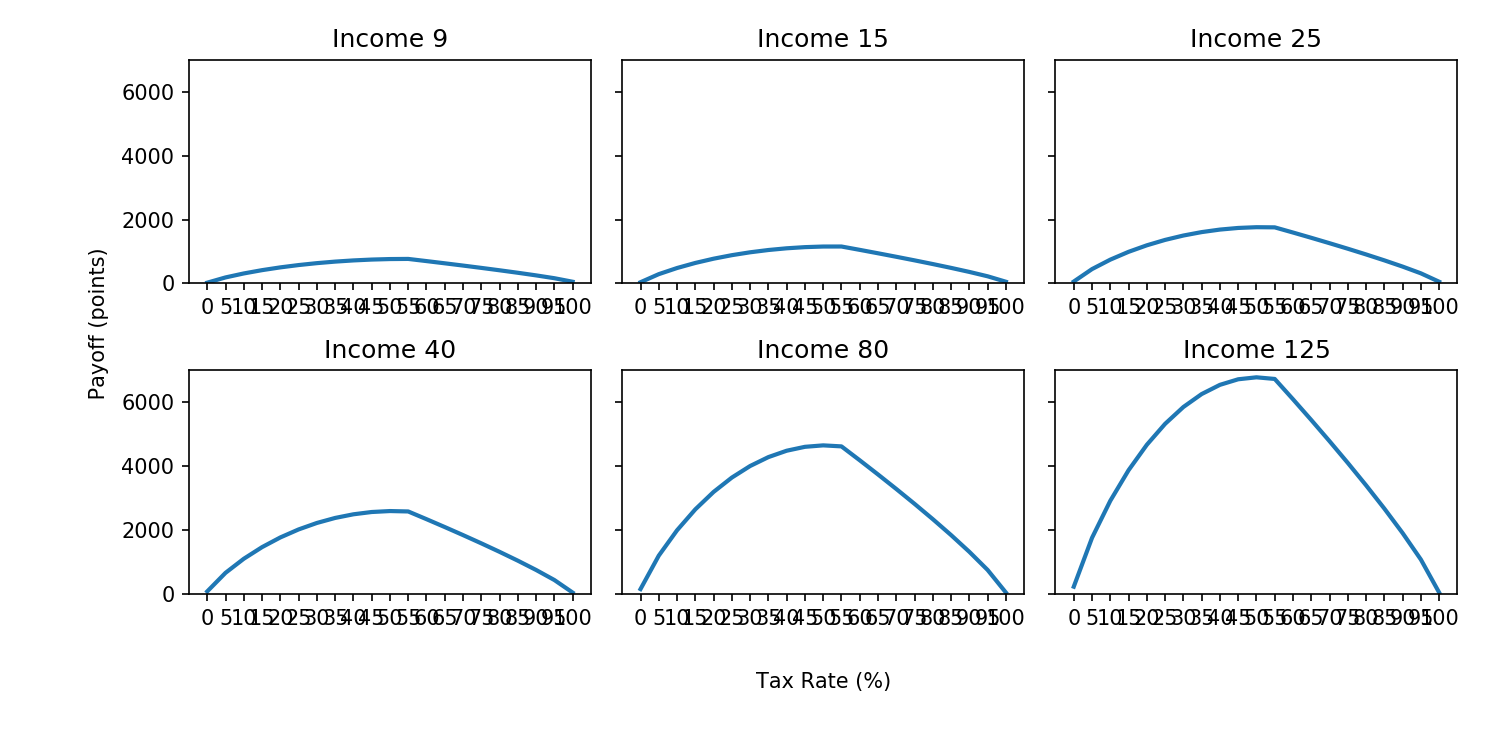

In [9]:
plotting_payoffs(unique_task_endowments, final_payoffs, tax_rates, "final_payoff_", 7000)

## Dissagregating the public payoffs (G)

### Obtaining H(T)

In [10]:
theta = 0.025 # theta from original functions

In [11]:
def obtaining_public_contributions(input_tax_rates, endowments):
    """
    Calculating total public contributions for any given tax
    
    Input: tax rates (list), society endowments (list)
    Output: total contribution for each tax
    """

    contributions = []
    
    # summing all contributions for a given tax rate
    for tax_rate in tax_rates:
        current_contributions = [tax_rate*endowment for endowment in endowments]
        total_current_contribution = sum(current_contributions)
        contributions.append(total_current_contribution) # storing total contribution for current tax
    
    return contributions

In [12]:
total_public_contributions = obtaining_public_contributions(tax_rates, original_task_endowments)

In [13]:
def calculating_public_incomes(total_public_contributions, theta):
    """
    Calculates public incomes using Kamei et al (?) public sector function
    for a given set of total contributions 
    
    Input: total public contributions for set of tax rates (list), theta param. (float)
    Output: public income per capita for all possible total contributions (list)
    """
    
    public_incomes = []
    
    for total_public_contribution in total_public_contributions:
    
        if total_public_contribution <= 192:
            # public income for current total contribution
            public_incomes.append(101 / (1 + 100 * math.exp(-theta * total_public_contribution)) - 1)
            
        else:
            public_incomes.append(101 / (1 + 100 * math.exp(-theta * 192)) - 1)
    
    return public_incomes

In [14]:
public_incomes = calculating_public_incomes(total_public_contributions, theta)

### Obtaining R(T)

In [15]:
gamma = 0.85 # gamma from original functions

In [16]:
def calculating_private_productivities(total_public_contributions, alpha, beta):
    """
    Calculates public productivities according to Kamei et al (?) functions for 
    the private sector
    
    Input: total contributions (list), alpha param. (float), beta param. (float)
    Output: private productivities for all possible contributions (list)
    """
    
    private_productivities = []
    
    for total_public_contribution in total_public_contributions:
    
        if total_public_contribution <= 192:
            # private productivity for current total contribution
            private_productivities.append(ctrl.alpha + ctrl.beta*total_public_contribution)
        else:
            private_productivities.append(ctrl.alpha + ctrl.beta*192)
            
    return private_productivities

In [17]:
private_productivities = calculating_private_productivities(total_public_contributions, ctrl.alpha, ctrl.beta)

In [18]:
def calculating_priv_income(endowment, tax_rate, private_productivity, gamma):
    """
    Calculates the private income for an individual player using Kamei et al (?) private sector function
    
    Input: base endowment (float), current tax rate (float), private productivity (float), gamma param. (float)
    Output: private income for player (float)
    """
    
    return ((endowment*(1-tax_rate))**(gamma))*(private_productivity)**(gamma)

In [19]:
def calculating_all_private_incomes(task_endowments, tax_rates, private_productivities, gamma):
    """
    Calculates the private income for all players using Kamei et al (?) private sector function
    
    Input: unique task endowments (list), tax rates (list), private productivities (list), gamma param. (float)
    Output: dict with all possible private incomes for player (dict)
    """
    
    private_incomes = {}
    
    for task_endowment in task_endowments:
        index = 0 # index for calling the private productivity that corresponds to an specific tax rate
    
        private_incomes[f"private_incomes_{task_endowment}"] = [] # list with all the private incomes for a player
        
        for tax_rate in tax_rates: # calculating all the private incomes for an specific player
            private_income = calculating_priv_income(task_endowment, tax_rate, private_productivities[index], gamma)
            private_incomes[f"private_incomes_{task_endowment}"].append(round(private_income, 3))
            index += 1
    
    return private_incomes

In [20]:
private_incomes = calculating_all_private_incomes(unique_task_endowments, tax_rates, private_productivities, gamma)

### Obtaining G values

In [21]:
def calculating_g_values(task_endowments, tax_rates, private_incomes, public_incomes):
    """
    Calculating values of g function for all players
    
    Input: unique task endowments (list), tax rates (list), private incomes (list), public incomes (float)
    Output: dict with all possible private incomes for player (dict)
    """
    
    g_values = {}
    
    for task_endowment in task_endowments:
        index = 0 # index for calling the private productivity that corresponds to an specific tax rate

        g_values[f"player_end_{task_endowment}"] = [] # list with all the private incomes for a player

        # calculating all the g function values per player
        for index in range(len(tax_rates)): 
            g_values[f"player_end_{task_endowment}"].append(private_incomes[f"private_incomes_{task_endowment}"][index] + public_incomes[index])    
            
    return g_values

In [22]:
g_values = calculating_g_values(unique_task_endowments, tax_rates, private_incomes, public_incomes)

## Updating G values

### 1. G(0, Y) = 0

In [23]:
for endowment in unique_task_endowments:
    g_values[f"player_end_{endowment}"][0] = 0

### 2. Setting up new optimal taxes

If  Y_i > Y_i’:
- u_i(t, Y_i) > u_i(t, Y_i’)  for all t
- t_i < t_i’    where  t_i := max arg u_i(t, Y_i)

In [24]:
# setting up optimal taxes
min_opt_tax = 40
max_opt_tax = 65
step = 5

optimal_taxes = {}

# creating a dict with optimal tax per player
counter = 0
for task_endowment in unique_task_endowments:
    optimal_taxes[f"player_end_{task_endowment}"] = max_opt_tax - counter*step
    counter += 1

In [25]:
optimal_taxes

{'player_end_9': 65,
 'player_end_15': 60,
 'player_end_25': 55,
 'player_end_40': 50,
 'player_end_80': 45,
 'player_end_125': 40}

In [26]:
def finding_linear(first_point, second_point):
    """
    Finds slopes and intercepts of linear function given two points
    
    Input: first point (tuple), second point (tuple)
    Output: slope and intercept (tuple)
    """
    
    slope = (first_point[1] - second_point[1])/(first_point[0] - second_point[0])
    intercept = first_point[1] - slope*first_point[0]
    
    return (slope, intercept)

In [27]:
def payoffs_after_optimal(taxes, linear_parameters, softener_param):
    """
    Gets G payoffs for all taxes after the optimal
    
    Input: taxes to be evaluated (list), slope and intercept (tuple)
    Output: payoffs for evaluated taxes (list)
    """
    
    slope = linear_parameters[0]
    intercept = linear_parameters[1]
    
    linear_payoffs = [tax*slope + intercept for tax in taxes]
    first_payoff = linear_payoffs[0]
    last_payoff = linear_payoffs[-1]
    softened_payoffs = [payoff**softener_param for payoff in linear_payoffs[1:-1]]
    
    return [first_payoff] + softened_payoffs + [last_payoff]

In [28]:
def payoffs_before_optimal(optimal_point, taxes, softener_parameter):
    """
    Calculates payoffs before the optimal that comply with G(0, Y) = 0
    
    Input: optimal tax and optimal_index (tuple), tax rates before optimal (list) softener parameter (float)
    Output: fixed payoffs before optimal (list)
    """
    
    linear_parameters = finding_linear((0,0), optimal_point)
    
    print("optimal point: ", optimal_point)
    
    slope = linear_parameters[0]
    intercept = linear_parameters[1]

    linear_payoffs = [tax*slope + intercept for tax in taxes]
    # last_payoff = linear_payoffs[-1]
    softened_payoffs = [payoff**softener_parameter for payoff in linear_payoffs]
    
    # return softened_payoffs + [last_payoff]
    return softened_payoffs

In [36]:
# finding slopes and intercepts for all players (t* -> 1)
final_point = (1, g_values["player_end_9"][-1]) # (max tax, final payoff)
softener_parameter = 0.85

for task_endowment in unique_task_endowments:    
    print("task endowment: ", task_endowment)
    
    # optimal tax and payoffs for current endowment
    optimal_tax = optimal_taxes[f"player_end_{task_endowment}"]
    optimal_tax_index = int(optimal_taxes[f"player_end_{task_endowment}"]/step)
    optimal_payoff = g_values[f"player_end_{task_endowment}"][optimal_tax_index]
    print("optimal_payoff: ", optimal_payoff)
    
    initial_point = (optimal_tax/100, optimal_payoff)
    
    # finding payoffs after optimal
    taxes_after_optimal = [tax/100 for tax in range(optimal_tax, 100 + step, step)]
    linear_params = finding_linear(initial_point, final_point)
    payoffs_aft = payoffs_after_optimal(taxes_after_optimal, linear_params, softener_parameter)
    
    # updating payoffs after optimal
    updated_payoffs = g_values[f"player_end_{task_endowment}"].copy()
    
    updated_payoffs = updated_payoffs[:optimal_tax_index]
    
    updated_payoffs = updated_payoffs + payoffs_aft
    
    # updating payoffs before optimal
    taxes_before_optimal = [tax/100 for tax in range(0, optimal_tax + step, step)]
    payoffs_bef = payoffs_before_optimal(initial_point, taxes_before_optimal, softener_parameter)
    updated_payoffs = payoffs_bef + updated_payoffs[optimal_tax_index+1:]
    
    g_values[f"player_end_{task_endowment}"] = updated_payoffs

task endowment:  9
optimal_payoff:  331.04874932734486
optimal point:  (0.65, 331.04874932734486)
task endowment:  15
optimal_payoff:  524.1897670303787
optimal point:  (0.6, 524.1897670303787)
task endowment:  25
optimal_payoff:  831.3413826642259
optimal point:  (0.55, 831.3413826642259)
task endowment:  40
optimal_payoff:  1185.3217825928405
optimal point:  (0.5, 1185.3217825928405)
task endowment:  80
optimal_payoff:  1983.2560906535728
optimal point:  (0.45, 1983.2560906535728)
task endowment:  125
optimal_payoff:  2719.589396152709
optimal point:  (0.4, 2719.589396152709)


In [37]:
g_values

{'player_end_9': [0.0,
  15.66954223485291,
  28.244364376122256,
  39.86661626025208,
  50.91049292025807,
  61.54330471164195,
  71.85961269456126,
  81.91994335320794,
  91.76621059225597,
  101.42906973421965,
  110.9318636839332,
  120.29292680887917,
  129.52701836801685,
  138.64625995079126,
  124.44524668995459,
  109.95152762884943,
  95.1112690043661,
  79.84847861872372,
  64.04833575020004,
  47.51848568781593,
  54.403950328224596],
 'player_end_15': [0.0,
  24.78912507166319,
  44.68242087710836,
  63.0687560521877,
  80.54010497213146,
  97.36115165043248,
  113.68149113664754,
  129.59687597825334,
  145.1736137297166,
  160.46020093372692,
  175.49356593055094,
  190.30271358336995,
  204.91099295438516,
  185.22738568775077,
  165.1666492583372,
  144.6650639169437,
  123.63520697479449,
  101.95022624440105,
  79.41050811746786,
  55.658552644897064,
  54.40395032822448],
 'player_end_25': [0.0,
  39.502875237759646,
  71.20396916497758,
  100.5036359503556,
  128.3

<IPython.core.display.Javascript object>


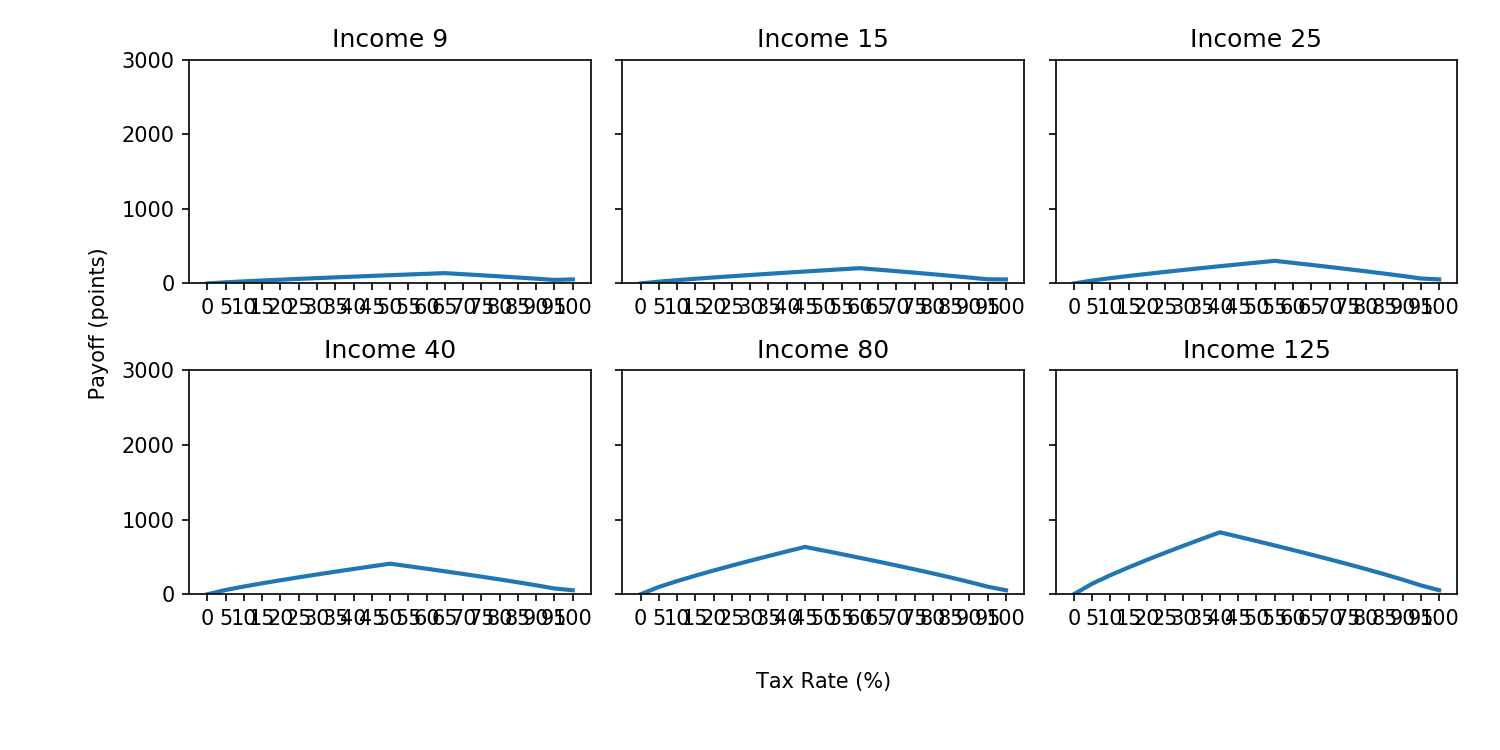

In [38]:
plotting_payoffs(unique_task_endowments, g_values, tax_rates, "player_end_", 3000)